### Step 1: Import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics \
    import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


### Step 2: Read the dataset using Pandas

In [2]:
data = pd.read_csv('car.csv')
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


### Step 3: Do the Basic EDA

In [3]:
# Check the shape of the data
data.shape

(301, 9)

In [4]:
# Check column names of the data
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],
      dtype='object')

We have 301 cars data, and 9 features that are car name, year, present price, kms driven, fuel type, seller type, transmission, owner, selling price.

This dataset is very cleaned, and it is purposely taken because we don't want to focus more on data preprocessing. Rather we want to see the end-to-end process of an ML project.

In [5]:
# Check for missing values
data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [6]:
# Check for the datatypes and other info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Check the statistics of the data
data.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.247915,5.082812
min,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,15000.000000,0.000000,0.900000
50%,2014.000000,6.400000,32000.000000,0.000000,3.600000
75%,2016.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


Let's check the correlation between variables using the `data.corr()` method:

In [9]:
# Let's see the correlation between the features
data.corr(numeric_only=True)

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
Year,1.000000,-0.047584,-0.524342,-0.182104,0.236141
Present_Price,-0.047584,1.000000,0.203647,0.008057,0.878983
Kms_Driven,-0.524342,0.203647,1.000000,0.089216,0.029187
Owner,-0.182104,0.008057,0.089216,1.000000,-0.088344
Selling_Price,0.236141,0.878983,0.029187,-0.088344,1.000000


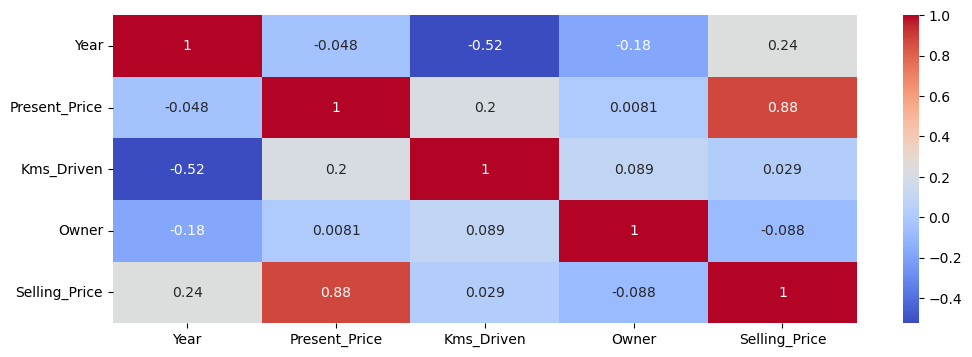

In [11]:
# Plot the heatmap
plt.figure(figsize=(12,4))
correlations = data.corr(numeric_only=True)
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

The heatmap shows that selling price depends more on present price, year, etc.

### Step 4: Do the basic preprocessing

Here a few columns (fuel type and transmission) have text data, so we will perform label encoding:

In [12]:
# Let's encode the text features using Label Encoding
le = LabelEncoder()
data['Fuel_Type'] = le.fit_transform(data.Fuel_Type.values)
data['Transmission'] = le.fit_transform(data.Transmission.values)
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,2,Dealer,1,0,3.35
1,sx4,2013,9.54,43000,1,Dealer,1,0,4.75
2,ciaz,2017,9.85,6900,2,Dealer,1,0,7.25
3,wagon r,2011,4.15,5200,2,Dealer,1,0,2.85
4,swift,2014,6.87,42450,1,Dealer,1,0,4.60


In [13]:
# Petrol=2, Diesel=1, CNG=0
data.Fuel_Type.unique()

array([2, 1, 0])

In [14]:
# Manual=1, Automatic=0
data.Transmission.unique()

array([1, 0])

In [15]:
# First=0, Second=1, Fourth=3
data.Owner.unique()

array([0, 1, 3])

In our project, *selling price* is the target feature, and all other features are input features.

In [13]:
# Target column is 'Selling_Price'
predict = 'Selling_Price'
data = data[['Year', 'Kms_Driven', 'Present_Price', 'Fuel_Type', 
            'Transmission', 'Owner', 'Selling_Price']]

In [15]:
# Split dataset into input (other than 'Selling_Price') and output ('Selling_Price')
x = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

Now, let's divide the data into train and test. We keep 80/20 for train/test:

In [16]:
# Now split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Step 5: Do the model building

Here we are going to build 7 different regression models, and we will check which one is going to perform well. We could also hypertune these models, but we are skipping this step here. The models we are using here are:
- Linear regression
- Decision tree regression
- Random Forest regression
- Gradient Boosting Machine regression
- Light Gradient Boosting Machine regression
- Xtreme Gradient Boosting Machine regression
- Cat Boost regression

In [17]:
# Train all models on x_train and y_train
lr_model = LinearRegression().fit(x_train, y_train)
dt_model = DecisionTreeRegressor().fit(x_train, y_train)
rf_model = RandomForestRegressor().fit(x_train, y_train)
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)
lgbm_model = LGBMRegressor().fit(x_train, y_train)
xgb_model = XGBRegressor().fit(x_train, y_train)
catb_model = CatBoostRegressor().fit(x_train, y_train)

Learning rate set to 0.032678
0:	learn: 4.8547681	total: 56.1ms	remaining: 56.1s
1:	learn: 4.7598423	total: 56.7ms	remaining: 28.3s
2:	learn: 4.6653673	total: 57.1ms	remaining: 19s
3:	learn: 4.5732916	total: 57.5ms	remaining: 14.3s
4:	learn: 4.4805380	total: 57.9ms	remaining: 11.5s
5:	learn: 4.4059976	total: 58.3ms	remaining: 9.66s
6:	learn: 4.3216745	total: 58.6ms	remaining: 8.32s
7:	learn: 4.2223060	total: 59ms	remaining: 7.32s
8:	learn: 4.1482513	total: 59.2ms	remaining: 6.52s
9:	learn: 4.0614029	total: 59.6ms	remaining: 5.9s
10:	learn: 3.9821335	total: 59.9ms	remaining: 5.39s
11:	learn: 3.9191150	total: 60.3ms	remaining: 4.96s
12:	learn: 3.8402599	total: 60.7ms	remaining: 4.61s
13:	learn: 3.7574053	total: 61.1ms	remaining: 4.3s
14:	learn: 3.6780038	total: 61.4ms	remaining: 4.03s
15:	learn: 3.6190597	total: 61.7ms	remaining: 3.79s
16:	learn: 3.5523699	total: 61.9ms	remaining: 3.58s
17:	learn: 3.4978295	total: 62.1ms	remaining: 3.39s
18:	learn: 3.4371543	total: 62.5ms	remaining: 3.23

### Step 6: Evaluate models

Now it's time to evaluate these models. Various metrics can be used. Here we are going to use MAE, MSE, R2 Score, MAPE, etc.

In [18]:
# Define function to evaluate all these models
def evaluate_model(name, model, x_test, y_test):
    prediction = model.predict(x_test)
    metrics = {}
    metrics['Model Name'] = name
    metrics['Mean Absolute Error'] = mean_absolute_error(y_test, prediction)
    metrics['Mean Absolute Percentage Error'] = mean_absolute_percentage_error(y_test, prediction)
    metrics['Mean Squared Error'] = mean_squared_error(y_test, prediction)
    metrics['Root Mean Squared Error'] = np.sqrt(mean_squared_error(y_test, prediction))
    metrics['R2 Score'] = r2_score(y_test, prediction)
    return metrics


In [19]:
# Let's evaluate these models and see the results
pd.DataFrame([
    evaluate_model('LR Model', lr_model, x_test, y_test),
    evaluate_model('DT Model', dt_model, x_test, y_test),
    evaluate_model('RF Model', rf_model, x_test, y_test),
    evaluate_model('GBM Model', gbm_model, x_test, y_test),
    evaluate_model('LGBM Model', lgbm_model, x_test, y_test),
    evaluate_model('XGB Model', xgb_model, x_test, y_test),
    evaluate_model('CatBoost Model', catb_model, x_test, y_test)
])

,Model Name,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,LR Model,1.162564,0.789013,5.304341,2.303115,0.826934
1,DT Model,0.723607,0.180388,1.337856,1.156657,0.956349
2,RF Model,0.786551,0.145691,5.707961,2.389134,0.813765
3,GBM Model,0.860128,0.189256,7.723553,2.779128,0.748001
4,LGBM Model,0.897355,0.188271,10.599605,3.255703,0.654163
5,XGB Model,0.715767,0.153409,3.086565,1.756862,0.899294
6,CatBoost Model,0.828063,0.193740,10.017586,3.165057,0.673153


Our table shows that the MAE is lowest for the XGB model.

### Step 7: Prediction

Let's predict using our test data and new input data and check the results:

In [20]:
# From the above results, as R2 is comparatively high in XGB Model
# so we will finalize this model. Also now let's do the prediction
# for x_test data
predictions = catb_model.predict(x_test)
predictions

array([ 0.4767558 ,  6.84234894,  0.62754262,  6.42203767,  0.25141508,
        3.01571084,  3.43486075, 22.8371363 ,  9.45684332,  0.54256292,
        8.74520649,  4.34798146,  0.36307424,  4.61026216, 10.89560063,
        0.80388317,  1.06333694,  0.72973273,  3.11676129,  4.44838825,
        1.95523454,  4.25832525,  0.56191007,  7.28685029,  3.9797098 ,
        7.22727781,  9.30285408,  7.66111501,  3.93921727, 10.178289  ,
        0.52878028,  3.25386145,  0.81446157,  1.03996868,  7.91646623,
        0.34935569,  4.28585874,  8.85065937,  7.24896623,  2.89038728,
        7.12666783,  7.75863793,  8.56007865,  4.90733997,  4.2634244 ,
        0.58381965,  8.24888965,  4.42268152,  0.94498604,  4.15801741,
        5.22402404,  0.9819032 ,  0.52705364,  2.70287472,  5.74712368,
        6.30733575, -0.05162875,  4.45531333,  0.41689449,  0.59505749,
        1.31743936])

In [22]:
# Let's do the prediction with new unknown data
input = [[2016, 30000, 6.87, 1, 1, 0, 0]]
price = catb_model.predict(input)
print(price.round(1)[0], 'in Lakhs')

5.3 in Lakhs


### Step 8: Save Model

Finally, save the model using the `pickle` package. You can use the pickle operation to serialize your ML algorithms and save a serialized format to file. 

Later you can load this file to deserialize your model and use it to make new predictions. So, at the end of this notebook, a `car_price_predictor_model.pkl` file will be created inside the */model* directory, which we are going to load in the backend REST API.

In [24]:
# Save the model in pickle file
import pickle
pickle.dump(catb_model, open('car_price_predictor_model.pkl', 'wb'))